In [1]:
%matplotlib inline
from __future__ import division, print_function
import numpy as np
import pandas as pd
import numpy.random as random
import matplotlib.pyplot as plt

In [2]:
import keras
print(keras.__version__)
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Activation

Using Theano backend.
WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5103)


2.1.1


In [3]:
a = 5
b = 3
x = random.random(30) * 5 #random x values [0, 5)
y = a*x + b #+ random.uniform()/100.0 # y is linear in x with some noise in [0, 1/100)

[ 3.87584396  4.10705968  3.56618621  0.02865584  0.13606919  1.988565
  1.39077516  2.88520323  4.58949589  2.26516593  3.16453913  0.5915769
  2.85724576  3.49082681  2.44241109  4.31302762  4.34756142  3.99191654
  1.9217016   2.98569093  2.11894703  0.90011158  1.3571682   0.85239028
  1.6687187   2.71546058  4.50895729  3.91536482  0.39662108  0.31225721]
[ 22.37921978  23.53529841  20.83093106   3.14327921   3.68034596
  12.94282502   9.95387581  17.42601613  25.94747946  14.32582967
  18.82269563   5.95788448  17.28622878  20.45413403  15.21205545
  24.56513809  24.7378071   22.95958268  12.60850801  17.92845464
  13.59473516   7.50055789   9.78584101   7.2619514   11.34359351
  16.57730289  25.54478643  22.57682409   4.98310542   4.56128604]


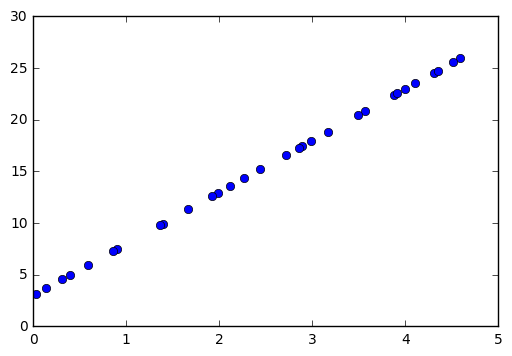

In [4]:
plt.plot(x,y, 'bo')
print(x)
print(y)

In [5]:
linearModel = Sequential()
#Dense default parameters: activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros'
linearModel.add(Dense(1, input_shape=(1,), kernel_initializer='ones')) 
#Default SGD parameters: keras.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)
#SGD converges much much faster than rmsprop when deal with linear neural network
linearModel.compile(optimizer='sgd', loss='mse',metrics=['accuracy'])
linearModel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [12]:
linearModel.fit(x,y, batch_size=1, epochs=30, shuffle=False) #Default: shuffle=True

Epoch 1/30
30/30 [==============================] - 0s 935us/step - loss: 7.0638e-06 - acc: 0.0000e+00
Epoch 2/30
30/30 [==============================] - 0s 921us/step - loss: 5.3415e-06 - acc: 0.0000e+00
Epoch 3/30
30/30 [==============================] - 0s 914us/step - loss: 4.0360e-06 - acc: 0.0000e+00
Epoch 4/30
30/30 [==============================] - 0s 916us/step - loss: 3.0508e-06 - acc: 0.0000e+00
Epoch 5/30
30/30 [==============================] - 0s 912us/step - loss: 2.3055e-06 - acc: 0.0000e+00
Epoch 6/30
30/30 [==============================] - 0s 914us/step - loss: 1.7423e-06 - acc: 0.0000e+00
Epoch 7/30
30/30 [==============================] - 0s 911us/step - loss: 1.3167e-06 - acc: 0.0000e+00
Epoch 8/30
30/30 [==============================] - 0s 915us/step - loss: 9.9522e-07 - acc: 0.0000e+00
Epoch 9/30
30/30 [==============================] - 0s 918us/step - loss: 7.5238e-07 - acc: 0.0000e+00
Epoch 10/30
30/30 [==============================] - 0s 939us/step - loss

In [13]:
linearModel.evaluate(x,y)

30/30 [==============================] - 0s 41us/step


[1.6468466590424669e-09, 0.0]

In [14]:
linearModel.get_weights()

[array([[ 5.00002527]], dtype=float32), array([ 2.9999187], dtype=float32)]

In [9]:
t = random.randint(0,20,8)
print('t = %s'%t)
linearModel.predict(t)

t = [ 2  4 15  4  0  4  1 10]


array([[ 12.84523964],
       [ 23.1114006 ],
       [ 79.57528687],
       [ 23.1114006 ],
       [  2.57907844],
       [ 23.1114006 ],
       [  7.71215916],
       [ 53.90988159]], dtype=float32)

In [132]:
linearModel.__dict__
dir(linearModel)

{'_flattened_layers': [<keras.layers.core.Dense at 0x7f3fdc7dbe10>],
 '_output_mask_cache': {'139912258949456_139913702890320': None},
 '_output_shape_cache': {},
 '_output_tensor_cache': {},
 'built': True,
 'container_nodes': {'dense_13_ib-0', 'dense_input_13_ib-0'},
 'inbound_nodes': [<keras.engine.topology.Node at 0x7f3fdc7e9b50>],
 'input_layers': [<keras.engine.topology.InputLayer at 0x7f3fdc7e90d0>],
 'input_layers_node_indices': [0],
 'input_layers_tensor_indices': [0],
 'input_names': ['dense_input_13'],
 'inputs': [dense_input_13],
 'layers': [<keras.layers.core.Dense at 0x7f3fdc7dbe10>],
 'loss': 'mse',
 'loss_weights': None,
 'metrics': ['accuracy'],
 'metrics_names': ['loss', 'acc'],
 'metrics_tensors': [mean],
 'model': <keras.engine.training.Model at 0x7f3fdc7dbfd0>,
 'name': 'sequential_15',
 'nodes_by_depth': {0: [<keras.engine.topology.Node at 0x7f3fdc7e9a90>],
  1: [<keras.engine.topology.Node at 0x7f3fdc7e9290>]},
 'optimizer': <keras.optimizers.SGD at 0x7f3fdc782bd

In [201]:
import keras
print(keras.__version__)

1.1.0


In [150]:
repr(linearModel)

'<keras.models.Sequential object at 0x7f3fdc7dbd90>'

In [191]:
import inspect
len(inspect.getsourcelines(Sequential))

2